In [1]:
import nltk
nltk.download('punkt')
import matplotlib

[nltk_data] Downloading package punkt to /Users/tde/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Create a Python 3 script named lm.py that trains a language model on the provided Brown corpus

In [2]:
with open("brown-train.txt") as lm_train_data:
          str_train_data = lm_train_data.read()

### First, process the training data by tokenizing into words. 

In [3]:
tok_train_data = nltk.word_tokenize(str_train_data)

### Make a plot of the frequencies of each word, ordered by most frequent word to second most frequent, and so on. What pattern do you see? Does it follow Zipf's law?

In [16]:
freq = nltk.FreqDist(tok_train_data)

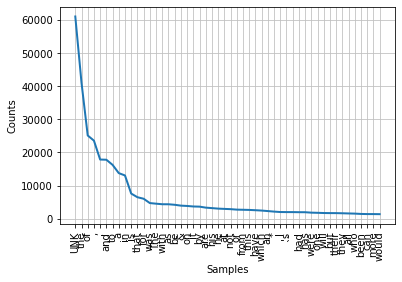

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
freq.plot(50)

### Compute bigram probabilities with add-a smoothing on the training data, and use these to calculate the perplexity on the training and validation sets. 

In [6]:
def createBigram(data):
    listOfBigrams = []
    bigramCounts = {}
    unigramCounts = {}
    nbyn = {}

    for i in range(len(data)):
        if i < len(data) - 1:

            listOfBigrams.append((data[i], data[i + 1]))

            if (data[i], data[i+1]) in bigramCounts:
                bigramCounts[(data[i], data[i + 1])] += 1
            else:
                bigramCounts[(data[i], data[i + 1])] = 1

        if data[i] in unigramCounts:
            unigramCounts[data[i]] += 1
        else:
            unigramCounts[data[i]] = 1

    return listOfBigrams, unigramCounts, bigramCounts

In [7]:
def calcBigramProb(listOfBigrams, unigramCounts, bigramCounts):

    listOfProb = {}
    for bigram in listOfBigrams:
        word1 = bigram[0]
        word2 = bigram[1]

        listOfProb[bigram] = (bigramCounts.get(bigram))/(unigramCounts.get(word1))

    file = open('bigramProb.txt', 'w')
    file.write('Bigram' + '\t\t\t' + 'Count' + '\t' + 'Probability' + '\n')

    for bigrams in listOfBigrams:
        file.write(str(bigrams) + ' : ' + str(bigramCounts[bigrams])
                   + ' : ' + str(listOfProb[bigrams]) + '\n')

    file.close()

    return listOfProb

In [8]:
train_bigrams = createBigram(tok_train_data)

In [14]:
bigram_probs = calcBigramProb(train_bigrams[0], train_bigrams[1], train_bigrams[2])